## 3-Sigma Techinque (Standard Deviation)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [3]:
data = pd.read_csv('raw_sales.csv')

In [4]:
data.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [6]:
type(data)


pandas.core.frame.DataFrame

In [7]:
data.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [8]:
#Function to detect Outliers on one-dimensional datasets.
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    #Set upper and lower limit to 3 Standard Deviation
    random_data_std = statistics.stdev(data)
    random_data_mean = statistics.mean(data)
    
    anomaly_cutoff = random_data_std * 3
    
    lower_limit = random_data_mean - anomaly_cutoff
    upper_limit = random_data_mean + anomaly_cutoff
    
    #Generate Outliers
    for outlier in data:
        if outlier>upper_limit or outlier<lower_limit:
            anomalies.append(outlier)
    return anomalies

In [9]:
data.price

0        525000
1        290000
2        328000
3        380000
4        310000
          ...  
29575    500000
29576    560000
29577    464950
29578    589000
29579    775000
Name: price, Length: 29580, dtype: int64

In [10]:
list_1 = find_anomalies(data['price'])

In [11]:
len(list_1)

461

In [12]:
len(data)

29580

In [13]:
data.price.skew()

4.312009366902366

In [16]:
import seaborn as sns

C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

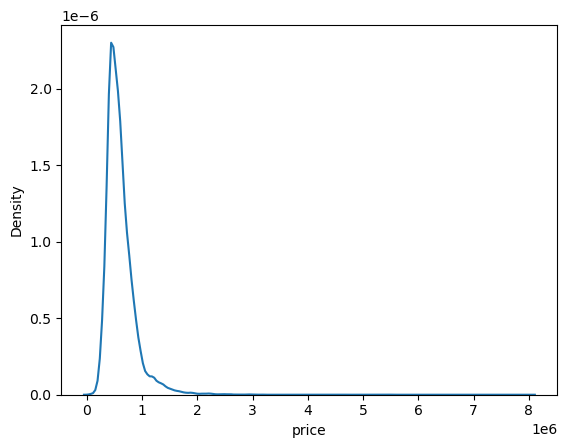

In [17]:
sns.kdeplot(data.price)

In [18]:
data['price_transformed'] = np.log(data.price)

In [19]:
data.price_transformed.skew()

0.4731646269984763

In [41]:
list_2 = find_anomalies(data.price_transformed)

In [42]:
len(list_2)

266

In [22]:
len(data)

29580

C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_transformed', ylabel='Density'>

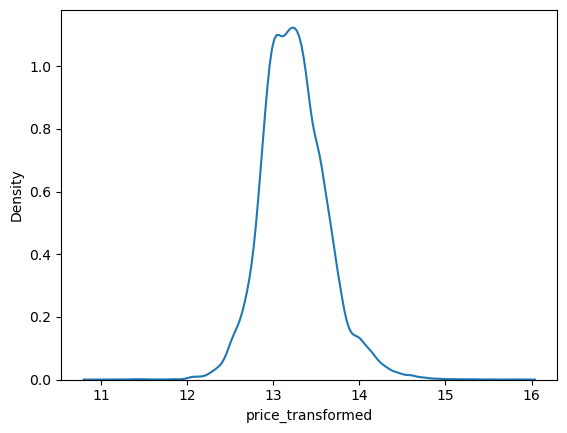

In [23]:
sns.kdeplot(data.price_transformed)

In [24]:
data['price_transformed_double'] = np.log(data.price_transformed)

In [25]:
data['price_transformed_double'].skew()

0.33092530655758573

In [43]:
list_3 = find_anomalies(data.price_transformed_double)

In [44]:
len(list_3)

251

In [28]:
len(data)

29580

## Boxplots


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

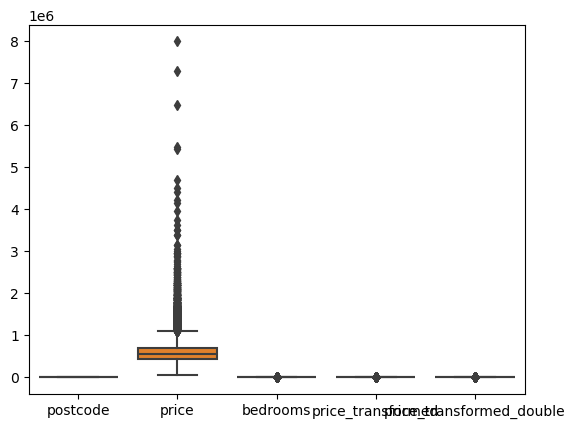

In [30]:
sns.boxplot(data=data)

The above code displays the plot below.

- As we can see, it considers everything above 75 or below ~ -35 to be an outlier. The results are very close to method 1 above.

In [31]:
import pandas as pd
df = pd.DataFrame(data)

In [32]:
len(df)

29580

In [33]:
df

,datesold,postcode,price,propertyType,bedrooms,price_transformed,price_transformed_double
0,2007-02-07 00:00:00,2607,525000,house,4,13.171154,2.578029
1,2007-02-27 00:00:00,2906,290000,house,3,12.577636,2.531920
2,2007-03-07 00:00:00,2905,328000,house,3,12.700769,2.541663
3,2007-03-09 00:00:00,2905,380000,house,4,12.847927,2.553182
4,2007-03-21 00:00:00,2906,310000,house,3,12.644328,2.537209
...,...,...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3,13.122363,2.574318
29576,2019-07-25 00:00:00,2612,560000,unit,2,13.235692,2.582917
29577,2019-07-26 00:00:00,2912,464950,unit,2,13.049685,2.568764
29578,2019-07-26 00:00:00,2601,589000,unit,2,13.286181,2.586725


In [34]:
df.describe()

,postcode,price,bedrooms,price_transformed,price_transformed_double
count,29580.000000,2.958000e+04,29580.000000,29580.000000,29580.000000
mean,2730.249730,6.097363e+05,3.250169,13.244695,2.583199
std,146.717292,2.817079e+05,0.951275,0.375214,0.028183
min,2600.000000,5.650000e+04,0.000000,10.941996,2.392608
25%,2607.000000,4.400000e+05,3.000000,12.994530,2.564529
50%,2615.000000,5.500000e+05,3.000000,13.217674,2.581555
75%,2905.000000,7.050000e+05,4.000000,13.465953,2.600165
max,2914.000000,8.000000e+06,5.000000,15.894952,2.766002


InterQuartile Range

IQR-Q3-Q1

In [35]:
list1 = [43, 54, 56, 61, 62, 66, 68, 69, 69, 70, 71, 72, 77, 78, 79, 85, 87, 88, 89, 93, 95, 96, 98, 99, 99]

In [36]:
len(list1)

25

In [37]:
max(list1)

99

In [38]:
min(list1)

43

In [39]:
import statistics
statistics.mean(list1)

76.96

In [40]:
sorted(list1)

[43,
 54,
 56,
 61,
 62,
 66,
 68,
 69,
 69,
 70,
 71,
 72,
 77,
 78,
 79,
 85,
 87,
 88,
 89,
 93,
 95,
 96,
 98,
 99,
 99]

To find the 90th percentile for these (ordered) scores, start by multiplying 90 percent times the total number of scores, which gives 90% * 25 = 0.90 * 25 = 22.5 (the index). Rounding up to the nearest whole number, we get 23.

In [45]:
list2 = sorted(list1)

In [46]:
list2

[43,
 54,
 56,
 61,
 62,
 66,
 68,
 69,
 69,
 70,
 71,
 72,
 77,
 78,
 79,
 85,
 87,
 88,
 89,
 93,
 95,
 96,
 98,
 99,
 99]

Hence, 98 is the 90th percentile for this dataset.

Now say we want to find the 20th percentile. Start by taking 0.20 × 25 = 5 (the index); this is a whole number, which tells us the 20th percentile is the average of the 5th and 6th values in the ordered data set (62 and 66).

So, 20th percentile is (62 + 66) / 2 = 64.

The median (the 50th percentile) for the test scores is the 13th score: 77.